# Coveo Dataset Stats

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Coveo dataset

In [72]:
browsing_train = pd.read_csv("../coveo_sample_data/browsing_train_sample.csv")
search_train = pd.read_csv("../coveo_sample_data/search_train_sample.csv")
sku_to_content = pd.read_csv("../coveo_sample_data/sku_to_content_sample.csv")

Be aware that a PDP may generate both a detail and a pageview event.

In [73]:
browsing_train.head(10)

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
5,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885234192,45ee51e47bb1c2e5fe1c0563d1ead53b602a7d0c68e85f...
6,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885304014,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
7,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885304014,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
8,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885310275,298d7b7b37ed8a75c5717e63064489c7f3bf5e71cedf83...
9,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885320873,b7effb75760046b628876248d84d56586796d22c0d10a2...


In [74]:
search_train.head(10)

,session_id_hash,query_vector,clicked_skus_hash,product_skus_hash,server_timestamp_epoch_ms
0,48fade624d47870058ce07dd789ccc04e46c70c0fa2a1b...,"[-0.20255649089813232, -0.016908567398786545, ...",NaN,NaN,1548575194779
1,8731ca84ff7bb8cb647531d54e64feedb2519b4a7792a7...,"[-0.007610442116856575, -0.14909175038337708, ...",NaN,['9ee9ffd7e2529a65f9a0b0c9eaae6330df85cf2e3af3...,1548276763869
2,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.20023074746131897, -0.03151938319206238, 0...",NaN,['7cc72dbed53bab78ec6a62feaa5052a7a1db7d201664...,1548937997295
3,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548938038268
4,9be980708345944960645d03606ea83b637cae9106b705...,"[-0.03269264101982117, -0.27234694361686707, 0...",NaN,['2a0ee2924feabeec35e21e8fcb4d5b0684d190e46cef...,1548938093827
5,57e1491447148ba86b0a14f1f12e9910ad97427ca5e2df...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548990350736
6,94d672f77ebca613f020d4d6aeb3706669647ceaa9a7fe...,"[-0.18556387722492218, -0.07620412111282349, 0...",NaN,['62c4ddab6c1c81c74d315376b3c0dc7768c0286b3dc6...,1548970203273
7,ebc25330712ab908d6044f8d9a7605b3e5f1a2d0f2772a...,"[-0.05228812247514725, -0.1633286029100418, 0....",NaN,['56e9531819044bb70b80b2e3f798dbd4f71b08cd7a1a...,1547741688511
8,49e0c1b5741a28a271b69067182ee1178b02e6b0341c44...,"[-0.06451448798179626, -0.24443978071212769, 0...",NaN,NaN,1547574659979
9,49e0c1b5741a28a271b69067182ee1178b02e6b0341c44...,"[-0.020983241498470306, -0.2368796169757843, 0...",NaN,NaN,1547574673838


In [75]:
sku_to_content.head(10)

,product_sku_hash,description_vector,category_hash,image_vector,price_bucket
0,26ce7b47f4c46e4087e83e54d2f7ddc7ea57862fed2e2a...,NaN,NaN,NaN,NaN
1,6383992be772b204a9ab75f86c86f5583d1bdd1222952d...,NaN,NaN,NaN,NaN
2,a2c3e2430c6ef9770b903ad08fa067a6b2b9db28f06e1b...,"[0.27629122138023376, -0.15763211250305176, 0....",06fa312761d4b39e2f649781514ac69a4c1505c221fc46...,"[340.3592564184389, -220.19025864725685, 154.0...",7.0
3,1028ef615e425c328e7b95010dfb1fb93cf63749a1bc80...,"[0.4058118760585785, -0.03595402091741562, 0.2...",115a6a7017ee55752b8487c77dfde92b0d501d10a2e69c...,"[180.3463662921092, 222.702322343354, -8.88703...",8.0
4,9870c682d0d52d635501249da0eeaa118fad430b695ea1...,"[-0.3206155300140381, 0.01991105079650879, 0.0...",0665a81d19c89281cc00e7f7d779ded2ed42c933838602...,"[-114.81079301576219, 84.55770104232334, 85.51...",2.0
5,dc1261876c9473cf4b87e6bfc7f1895b8a6241a53e82fc...,NaN,NaN,NaN,NaN
6,59ce06d83038128ed6eb997bfe477f677ea2f753413d40...,NaN,NaN,NaN,NaN
7,6d525bb527043f6a80a13e5581f31ad41dbfbcb7786f07...,"[-0.1854386031627655, 0.19424490630626678, -0....",0665a81d19c89281cc00e7f7d779ded2ed42c933838602...,"[-136.92241034233342, 38.10508984596936, 55.68...",6.0
8,4506042dfdaadb6b741ffdf38641fc2d75b5234047fde3...,NaN,NaN,NaN,NaN
9,b1d520b75f8c45a3e2b4c755b14fe5ce3378845fddba5e...,NaN,NaN,NaN,NaN


Columns

In [76]:
browsing_train.columns

Index(['session_id_hash', 'event_type', 'product_action', 'product_sku_hash',
       'server_timestamp_epoch_ms', 'hashed_url'],
      dtype='object')

In [77]:
search_train.columns

Index(['session_id_hash', 'query_vector', 'clicked_skus_hash',
       'product_skus_hash', 'server_timestamp_epoch_ms'],
      dtype='object')

In [78]:
sku_to_content.columns

Index(['product_sku_hash', 'description_vector', 'category_hash',
       'image_vector', 'price_bucket'],
      dtype='object')

Number of Sessions

In [79]:
browsing_train["session_id_hash"].nunique()

164

Number of Products

In [80]:
sku_to_content["product_sku_hash"].nunique()

999

Number of unique products in interactions

In [81]:
browsing_train["product_sku_hash"].nunique()

164

Number of Interactions

In [82]:
browsing_train.shape[0]

999

Number of Product Interactions

In [83]:
browsing_train["event_type"].value_counts()

pageview         741
event_product    258
Name: event_type, dtype: int64

Number of add-to-cart & Purchases

In [84]:
browsing_train["product_action"].value_counts()

detail      253
add           3
purchase      2
Name: product_action, dtype: int64

Number of Search Requests

In [85]:
search_train.shape[0]

999

Number of Search Clicks

In [86]:
search_train['clicked_skus_hash'].str.len().sum()

62288.0

Price Bucket Plot

price_bucket: The product price, provided as a 10-quantile integer.

In [87]:
sku_to_content['price_bucket'].describe()

count    471.000000
mean       5.505308
std        2.877549
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: price_bucket, dtype: float64

In [88]:
price_bucket_frequency: pd.DataFrame = sku_to_content.groupby(['price_bucket']).size().reset_index()
price_bucket_frequency.columns = ["price_bucket", "frequency"]

price_bucket_frequency

,price_bucket,frequency
0,1.0,49
1,2.0,51
2,3.0,43
3,4.0,37
4,5.0,48
5,6.0,51
6,7.0,54
7,8.0,47
8,9.0,45
9,10.0,46


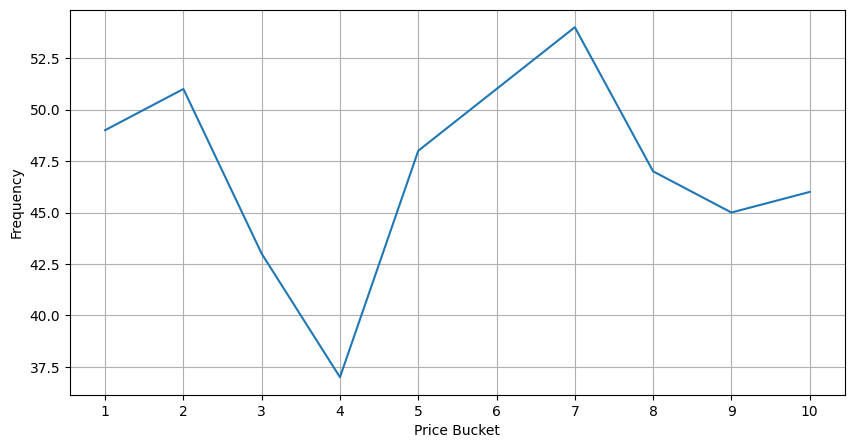

In [89]:
plt.figure(figsize=(10,5))
plt.plot(price_bucket_frequency['price_bucket'], price_bucket_frequency['frequency'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Price Bucket Plot over all products in transactions

In [90]:
product_interactions_with_prices = pd.merge(
    browsing_train[browsing_train['product_sku_hash'].notnull()]['product_sku_hash'],
    sku_to_content[['product_sku_hash', 'price_bucket']],
    on='product_sku_hash',
    how='left')
product_interactions_with_prices

,product_sku_hash,price_bucket
0,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,NaN
1,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,NaN
2,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,NaN
3,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,NaN
4,5fa44b39fe0ecc17d713a020ebb802bbe685c6f70d059c...,NaN
...,...,...
253,9a79b3cd9a51ba76c734e505a32875f13717fab1f2b3bb...,NaN
254,cad992eabce368cb528634a5946d943f7fc52f59d464c1...,NaN
255,650788beae75cb08d99dd70b3b3f430896d3019ab33d5b...,NaN
256,650788beae75cb08d99dd70b3b3f430896d3019ab33d5b...,NaN


In [91]:
product_prices: pd.DataFrame = product_interactions_with_prices.groupby('product_sku_hash').agg({'price_bucket': 'first'}).reset_index()
product_prices

,product_sku_hash,price_bucket
0,00a5874460281a2a46cbd072e00801c48db4f9603ffe9e...,NaN
1,010625253777d52be52b2d2c0bcd80fbfdb74a333dc855...,NaN
2,021d30d0f961950ea8fb4da67b265c00dbd1589968b8ad...,9.0
3,02811154912b9607cf422e76ed5cee633f7d8c4c1d4bec...,NaN
4,0413858097ea5d5e7c42e0c4fda7d8df4a8c50a3bda7e3...,NaN
...,...,...
159,fa1897fb2cf5ee52addb6fcbdf41b6c0909d89ec2ebcab...,NaN
160,fb835639a130b4393c3fd425aec84a862673991479fe3c...,NaN
161,fcecbed5506aea42120b40325693e94ec125a530bcb7db...,NaN
162,fe0f73550093dc3e4051ddaf2c6525c799c8a2823838dc...,NaN


In [92]:
product_interactions_with_prices.groupby('product_sku_hash').agg({'price_bucket': 'first'}).describe()

,price_bucket
count,3.000000
mean,8.333333
std,1.154701
min,7.000000
25%,8.000000
50%,9.000000
75%,9.000000
max,9.000000


In [93]:
price_count: pd.DataFrame = product_prices.groupby('price_bucket').size().reset_index()
price_count.columns = ['price_bucket', 'count']
price_count

,price_bucket,count
0,7.0,1
1,9.0,2


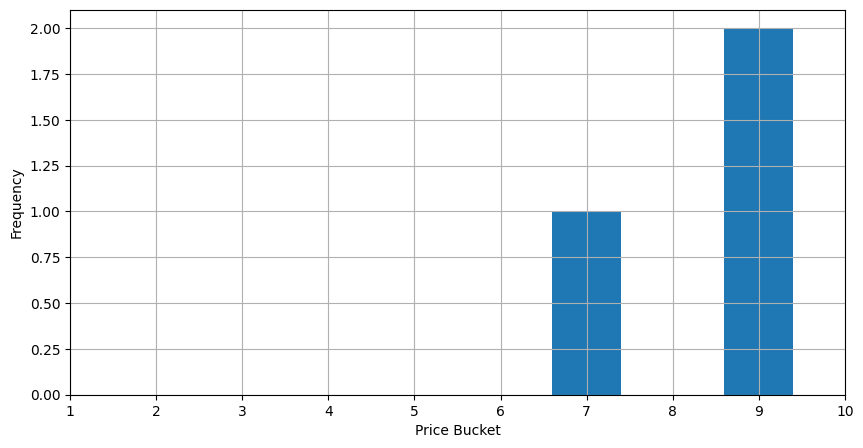

In [94]:
plt.figure(figsize=(10,5))
plt.bar(price_count['price_bucket'], price_count['count'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Price Bucket Plot over all interactions

In [95]:
price_count: pd.DataFrame = product_interactions_with_prices.groupby('price_bucket').size().reset_index()
price_count.columns = ['price_bucket', 'count']
price_count

,price_bucket,count
0,7.0,2
1,9.0,3


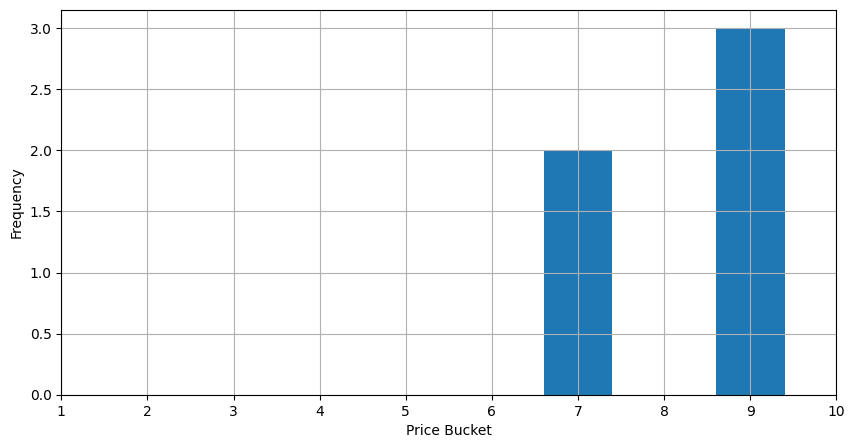

In [96]:
plt.figure(figsize=(10,5))
plt.bar(price_count['price_bucket'], price_count['count'])
plt.xlabel("Price Bucket")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Session length stats (with percentiles)

In [97]:
browsing_train.groupby(["session_id_hash"]).size().describe()

count    164.000000
mean       6.091463
std        7.675004
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       54.000000
dtype: float64

In [98]:
session_lengths: pd.DataFrame = browsing_train.groupby(["session_id_hash"]).size().reset_index()
session_lengths.columns = ['session_id', 'session_length']

session_lengths

,session_id,session_length
0,01d7d940ce504a0dd72b1d58db5151cfdf8db4dec8cc78...,1
1,0281ec4ac20cf43d403a4446087f6905bf663dcc96b8b6...,6
2,04710ddefd3cb44bd3c709c4cc71e97ccbf5a39554f0fa...,3
3,064c9669e8bcd2313430b37b4b3de4a09dc82996fd8562...,28
4,0a90ba8611e9bf4b1c1b4a4dfe2bb5cc802f3173c2de7c...,4
...,...,...
159,f0315d5fdfd9894cfe7cc7190035bf6b1a1639b47fe0d9...,4
160,f0682c73c8f2fb5584144e4f152bb5e58570cc1c69cd1f...,8
161,f77c71f3fb1861cd6fe7e011a6a14e49191c00079ec549...,1
162,fa72758dd42505af8491a9ac1845015a0e2f42e46f4856...,41


In [99]:
session_length_count: pd.DataFrame = session_lengths.groupby(["session_length"]).size().reset_index()
session_length_count.columns = ['session_length', 'count']

session_length_count

,session_length,count
0,1,26
1,2,42
2,3,7
3,4,19
4,5,10
5,6,16
6,7,7
7,8,8
8,9,4
9,10,5


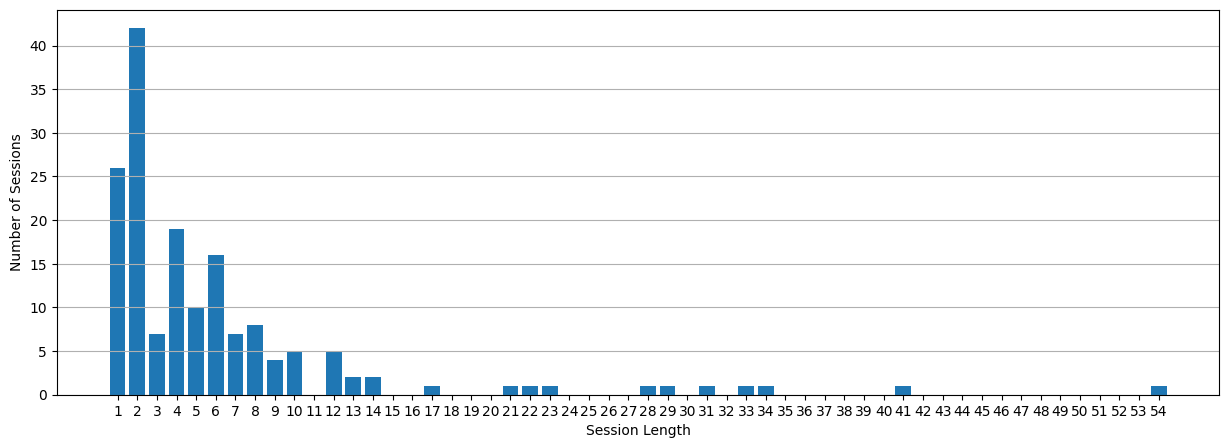

In [100]:
plt.figure(figsize=(15,5))
plt.bar(session_length_count['session_length'], session_length_count['count'])
plt.xlabel("Session Length")
plt.ylabel("Number of Sessions")
plt.xticks(range(1, session_length_count['session_length'].max() + 1))
plt.yticks(range(0, session_length_count['count'].max() + 1, 5))
plt.grid(visible=True, which='major', axis='y')
plt.show()

Number of interactions per item (with percentile)

In [101]:
browsing_train.groupby(["product_sku_hash"]).size().describe()

count    164.000000
mean       1.573171
std        1.383784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
dtype: float64

In [102]:
products_frequency: pd.DataFrame = browsing_train.groupby(["product_sku_hash"]).size().reset_index()
products_frequency.columns = ['product_sku', 'frequency']

products_frequency.head(10)

,product_sku,frequency
0,00a5874460281a2a46cbd072e00801c48db4f9603ffe9e...,1
1,010625253777d52be52b2d2c0bcd80fbfdb74a333dc855...,2
2,021d30d0f961950ea8fb4da67b265c00dbd1589968b8ad...,2
3,02811154912b9607cf422e76ed5cee633f7d8c4c1d4bec...,2
4,0413858097ea5d5e7c42e0c4fda7d8df4a8c50a3bda7e3...,1
5,050d7b49ce55fb0562e9506496042a218798b1ec01e509...,1
6,05c77acb89da6bdf0b531783e596f4d85d8007ede49484...,1
7,0636c0e5703db89227d2c7caa7de9b20cff6baada974d8...,2
8,0cc3edfc4388cedec459fb1a0422e83870d0c7540f30f3...,2
9,10116e7f6dbc268686dc4a3a3da76def630825b82b3634...,1


In [103]:
products_frequency_count: pd.DataFrame = products_frequency.groupby(["frequency"]).size().reset_index()
products_frequency_count.columns = ['product_frequency', 'count']

products_frequency_count

,product_frequency,count
0,1,117
1,2,29
2,3,9
3,4,3
4,5,2
5,7,2
6,8,1
7,12,1


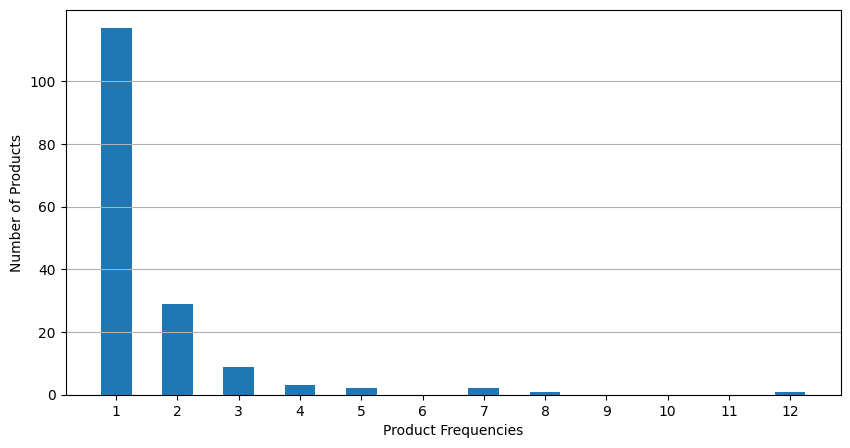

In [104]:
plt.figure(figsize=(10,5))
plt.bar(products_frequency_count['product_frequency'], products_frequency_count['count'], width=0.5)
plt.xlabel("Product Frequencies")
plt.ylabel("Number of Products")
plt.xticks(range(1, products_frequency_count['product_frequency'].max() + 1))
plt.yticks(range(0, products_frequency_count['count'].max() + 1, 20))
plt.grid(visible=True, which='major', axis='y')
plt.show()